In [109]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 

In [110]:
drivers = pd.read_csv('D:\Data_Science_Documents\Formula_one\data_files\drivers.csv')
driver_standings = pd.read_csv('D:\Data_Science_Documents\Formula_one\data_files\driver_standings.csv')
races =  pd.read_csv('D:\\Data_Science_Documents\\Formula_one\data_files\\races.csv')
teams = pd.read_csv('D:\Data_Science_Documents\Formula_one\data_files\constructors.csv')

Drivers Data Cleaning

In [111]:
drivers.drop(columns=['url', 'dob', 'nationality'], inplace=True)

Races Data Cleaning

In [112]:
races.drop(columns=['url', 'fp1_date', 'fp1_time', 'fp1_date','fp1_time','fp2_date','fp2_time','fp3_date','fp3_time','quali_date','quali_time','sprint_date','sprint_time'], inplace=True)

All 2022 Races

In [113]:
races = races[races['year'] == 2022]

Driver standings for only the races in 2022

In [114]:
driver_standings =  driver_standings[driver_standings['raceId'].isin(races['raceId'])]

replacing driver IDs with the names

In [115]:
driver_ids = driver_standings['driverId'].unique()

In [116]:
driver_ids

array([842, 830, 815, 807, 849, 846, 817, 848, 840, 854, 855,   4, 852,
       839, 822, 844, 832,   1, 847, 825,  20, 856], dtype=int64)

In [117]:
driver_names = drivers[drivers['driverId'].isin(driver_ids)].set_index('driverId')['code'].to_dict()

In [118]:
driver_standings['Name'] = driver_standings['driverId'].replace(driver_names)

Adding the race Name based on race id

In [119]:
race_names = races.set_index('raceId')['name'].to_dict()

In [120]:
driver_standings['Race Name'] = driver_standings['raceId'].replace(race_names)

In [121]:
driver_standings.reset_index(inplace=True)

In [122]:
driver_standings.sort_values(by='raceId')

,index,driverStandingsId,raceId,driverId,points,position,positionText,wins,Name,Race Name
0,33374,71395,1074,842,0.0,20,20,0,GAS,Bahrain Grand Prix
19,33434,71380,1074,825,10.0,5,5,0,MAG,Bahrain Grand Prix
18,33433,71379,1074,847,12.0,4,4,0,RUS,Bahrain Grand Prix
17,33432,71378,1074,1,15.0,3,3,0,HAM,Bahrain Grand Prix
16,33431,71377,1074,832,18.0,2,2,0,SAI,Bahrain Grand Prix
...,...,...,...,...,...,...,...,...,...,...
402,33817,71780,1094,20,36.0,11,11,0,VET,Mexico City Grand Prix
401,33816,71781,1094,856,2.0,21,21,0,DEV,Mexico City Grand Prix
421,33836,71771,1094,840,13.0,15,15,0,STR,Mexico City Grand Prix
410,33825,71772,1094,848,4.0,19,19,0,ALB,Mexico City Grand Prix


In [123]:
driver_teams = {
    'NOR' : 'darkorange', 
    'RIC' : 'darkorange', 
    'VER' : 'darkblue', 
    'PER' : 'darkblue', 
    'LEC' : 'red', 
    'SAI' : 'red',
    'RUS' : 'mediumaquamarine', 
    'HAM' : 'mediumaquamarine', 
    'MAG' : 'snow', 
    'MSC' : 'snow', 
    'ALB' : 'dodgerblue', 
    'LAT' : 'dodgerblue', 
    'DEV' : 'dodgerblue', 
    'GAS' : 'gray', 
    'TSU' : 'gray', 
    'ALO' : 'mediumblue', 
    'OCO' : 'mediumblue', 
    'HUL' : 'darkgreen',
    'VET' : 'darkgreen', 
    'STR' : 'darkgreen', 
    'BOT' : 'darkred',
    'ZHO' : 'darkred'}

In [124]:
driver_standings

,index,driverStandingsId,raceId,driverId,points,position,positionText,wins,Name,Race Name
0,33374,71395,1074,842,0.0,20,20,0,GAS,Bahrain Grand Prix
1,33375,71394,1074,830,0.0,19,19,0,VER,Bahrain Grand Prix
2,33376,71393,1074,815,0.0,18,18,0,PER,Bahrain Grand Prix
3,33377,71392,1074,807,0.0,17,17,0,HUL,Bahrain Grand Prix
4,33378,71391,1074,849,0.0,16,16,0,LAT,Bahrain Grand Prix
...,...,...,...,...,...,...,...,...,...,...
418,33833,71768,1094,4,71.0,9,9,0,ALO,Mexico City Grand Prix
419,33834,71769,1094,855,6.0,18,18,0,ZHO,Mexico City Grand Prix
420,33835,71770,1094,854,12.0,16,16,0,MSC,Mexico City Grand Prix
421,33836,71771,1094,840,13.0,15,15,0,STR,Mexico City Grand Prix


In [125]:
driver_standings['Team'] = driver_standings['Name'].replace(driver_teams)

In [126]:
grouped = driver_standings.groupby(['Team','raceId'])

In [127]:
driver_teams = {
    'NOR' : 'darkorange', 
    'RIC' : 'darkorange', 
    'VER' : 'darkblue', 
    'PER' : 'darkblue', 
    'LEC' : 'red', 
    'SAI' : 'red',
    'RUS' : 'mediumaquamarine', 
    'HAM' : 'mediumaquamarine', 
    'MAG' : 'snow', 
    'MSC' : 'snow', 
    'ALB' : 'dodgerblue', 
    'LAT' : 'dodgerblue', 
    'DEV' : 'dodgerblue', 
    'GAS' : 'gray', 
    'TSU' : 'gray', 
    'ALO' : 'mediumblue', 
    'OCO' : 'mediumblue', 
    'HUL' : 'darkgreen',
    'VET' : 'darkgreen', 
    'STR' : 'darkgreen', 
    'BOT' : 'darkred',
    'ZHO' : 'darkred'}

In [128]:
driver_standings['Name']

0      GAS
1      VER
2      PER
3      HUL
4      LAT
      ... 
418    ALO
419    ZHO
420    MSC
421    STR
422    LEC
Name: Name, Length: 423, dtype: object

In [129]:
fix_lec = driver_standings.loc[357]
driver_standings.drop(index = [357], inplace=True)
driver_standings=driver_standings.append(fix_lec, ignore_index=True)

In [130]:
driver_standings['Race Name'][-50:]

373         Japanese Grand Prix
374         Japanese Grand Prix
375         Japanese Grand Prix
376         Japanese Grand Prix
377         Japanese Grand Prix
378    United States Grand Prix
379    United States Grand Prix
380    United States Grand Prix
381    United States Grand Prix
382    United States Grand Prix
383    United States Grand Prix
384    United States Grand Prix
385    United States Grand Prix
386    United States Grand Prix
387    United States Grand Prix
388    United States Grand Prix
389    United States Grand Prix
390    United States Grand Prix
391    United States Grand Prix
392    United States Grand Prix
393    United States Grand Prix
394    United States Grand Prix
395    United States Grand Prix
396    United States Grand Prix
397    United States Grand Prix
398    United States Grand Prix
399    United States Grand Prix
400      Mexico City Grand Prix
401      Mexico City Grand Prix
402      Mexico City Grand Prix
403      Mexico City Grand Prix
404     

c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


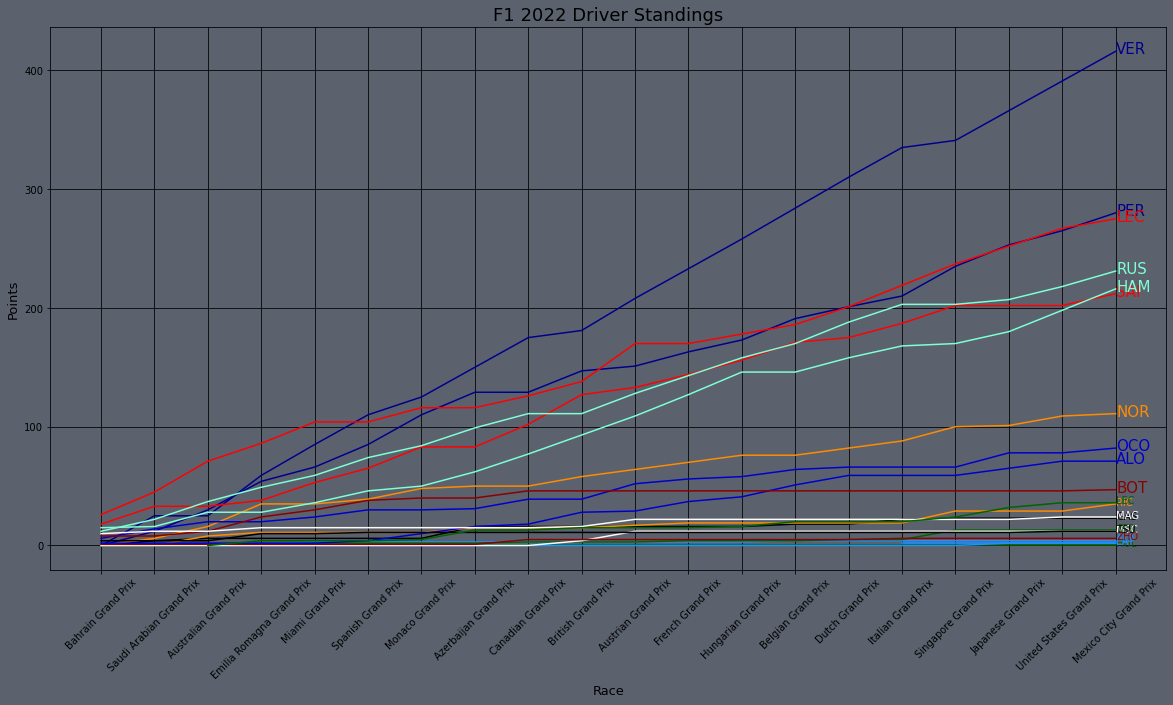

In [131]:

fig =  plt.figure( figsize=(20,10))

colors=['black', 'darkblue', 'darkblue', 'darkgreen', 'dodgerblue', 'darkorange','darkorange', 'dodgerblue','darkgreen','snow',
'darkred','mediumblue','black','mediumblue','darkred','red','red','aquamarine','aquamarine','snow','darkgreen','dodgerblue']

ax = sns.lineplot(driver_standings['Race Name'], driver_standings['points'],palette=colors,hue=driver_standings['Name'], markers='o')



fig.set_facecolor('#5b626e')
ax.set_facecolor('#5b626e')


plt.xticks(rotation=45)

legend = plt.legend(loc=(1, .42))
frame = legend.get_frame()
frame.set_facecolor('#5b626e')
frame.set_edgecolor('black')
plt.title('F1 2022 Driver Standings', fontsize=18)
plt.ylabel('Points', fontsize=13)
plt.xlabel('Race', fontsize=13)
plt.legend().set_visible(False)
x = 0
for line, name in zip(ax.lines, driver_standings['Name']):
    y = line.get_ydata()[-1]
    if y <= 45:
        ax.annotate(name, xy=(1,y), xytext=(-50,2), color=line.get_color(), 
                    xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                    size=10, va="center")
    else:
        ax.annotate(name, xy=(1,y), xytext=(-50,2), color=line.get_color(), 
                    xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                    size=15, va="center")
    x+=1
    if x >= 21:
        break



plt.grid(color ='black')
plt.show()

In [132]:
last_most_race = driver_standings['raceId'].unique()[-1]

In [133]:
driverids = driver_standings[(driver_standings['raceId'] == last_most_race) & (driver_standings['points'] <= 35)]['driverId']

In [134]:
driver_standings2 = driver_standings[driver_standings['driverId'].isin(driverids)]

In [135]:
driver_standings2[driver_standings2['raceId'] == last_most_race]

,index,driverStandingsId,raceId,driverId,points,position,positionText,wins,Name,Race Name,Team
400,33816,71781,1094,856,2.0,21,21,0,DEV,Mexico City Grand Prix,dodgerblue
402,33818,71779,1094,842,23.0,14,14,0,GAS,Mexico City Grand Prix,gray
405,33821,71776,1094,807,0.0,22,22,0,HUL,Mexico City Grand Prix,darkgreen
406,33822,71775,1094,849,2.0,20,20,0,LAT,Mexico City Grand Prix,dodgerblue
408,33824,71773,1094,817,35.0,12,12,0,RIC,Mexico City Grand Prix,darkorange
409,33825,71772,1094,848,4.0,19,19,0,ALB,Mexico City Grand Prix,dodgerblue
413,33829,71764,1094,825,24.0,13,13,0,MAG,Mexico City Grand Prix,snow
416,33832,71767,1094,852,12.0,17,17,0,TSU,Mexico City Grand Prix,gray
418,33834,71769,1094,855,6.0,18,18,0,ZHO,Mexico City Grand Prix,darkred
419,33835,71770,1094,854,12.0,16,16,0,MSC,Mexico City Grand Prix,snow


In [136]:
dev_add = {
    'driverStandingsId' : 00000,
    'raceId' : 1088,
    'driverId': 856,	
    'points':0,
    'position':22,
    'positionText' : '22',
    'wins' : 0,
    'Name'	: 'DEV', 
    'Race Name' : 'Dutch Grand Prix',
    'Team': 'dodgerblue'}

In [144]:
blank = pd.DataFrame(columns=driver_standings2.columns[0:])
blank=blank.append(dev_add,ignore_index=True)

In [145]:
driver_standings2 = driver_standings2.append(blank, ignore_index=True)

In [147]:
driver_standings2[driver_standings2['raceId'] == 1088]

,index,driverStandingsId,raceId,driverId,points,position,positionText,wins,Name,Race Name,Team
140,33711,71589,1088,825,22,11,11,0,MAG,Dutch Grand Prix,snow
141,33714,71592,1088,852,11,16,16,0,TSU,Dutch Grand Prix,gray
142,33716,71594,1088,855,5,17,17,0,ZHO,Dutch Grand Prix,darkred
143,33717,71595,1088,854,12,15,15,0,MSC,Dutch Grand Prix,snow
144,33718,71596,1088,840,5,18,18,0,STR,Dutch Grand Prix,darkgreen
145,33719,71597,1088,848,4,19,19,0,ALB,Dutch Grand Prix,dodgerblue
146,33720,71598,1088,817,19,13,13,0,RIC,Dutch Grand Prix,darkorange
147,33722,71600,1088,849,0,20,20,0,LAT,Dutch Grand Prix,dodgerblue
148,33723,71601,1088,807,0,21,21,0,HUL,Dutch Grand Prix,darkgreen
149,33726,71604,1088,842,18,14,14,0,GAS,Dutch Grand Prix,gray


In [148]:
driver_standings2['Name'].unique()

array(['GAS', 'HUL', 'LAT', 'RIC', 'ALB', 'STR', 'MSC', 'ZHO', 'TSU',
       'MAG', 'DEV'], dtype=object)

In [152]:
driver_standings2=driver_standings2[driver_standings2['Name'] != 'DEV']

In [154]:
driver_standings2['Name'].unique()

array(['GAS', 'HUL', 'LAT', 'RIC', 'ALB', 'STR', 'MSC', 'ZHO', 'TSU',
       'MAG'], dtype=object)

c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


DataError: No numeric types to aggregate

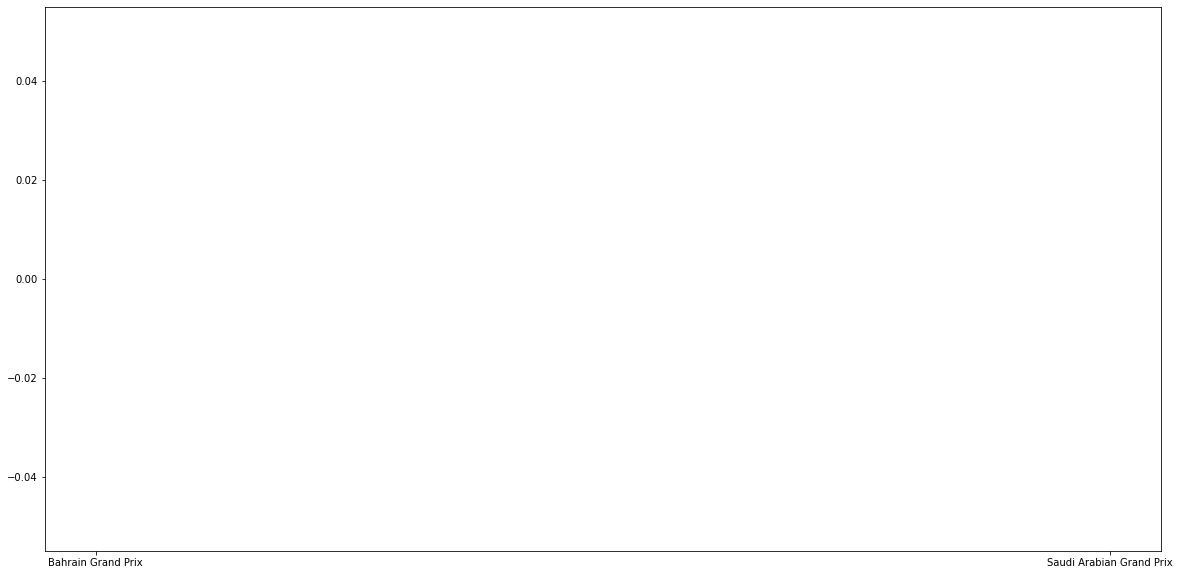

In [156]:

fig =  plt.figure( figsize=(20,10))

colors=['black','darkgreen', 'dodgerblue','darkorange', 'dodgerblue','darkgreen','snow',
'darkred','black','snow']

ax = sns.lineplot(driver_standings2['Race Name'], driver_standings2['points'],palette=colors,hue=driver_standings2['Name'], markers='o')



# fig.set_facecolor('#5b626e')
# ax.set_facecolor('#5b626e')


# plt.xticks(rotation=45)

# legend = plt.legend(loc=(1, .42))
# frame = legend.get_frame()
# frame.set_facecolor('#5b626e')
# frame.set_edgecolor('black')
# plt.title('F1 2022 Driver Standings', fontsize=18)
# plt.ylabel('Points', fontsize=13)
# plt.xlabel('Race', fontsize=13)




# x = 0
# for line, name in zip(ax.lines, driver_standings2['Name']):
#     print(name)
    # if name=='MAG' and x >9:
    #     name='VET'

    # if name=='TSU' and x >10:
    #     name='DEV'

    # y = line.get_ydata()[-1]
    # if name == 'LAT':
    #     ax.annotate(name, xy=(1,y), xytext=(-12,2), color=line.get_color(), 
    #             xycoords = ax.get_yaxis_transform(), textcoords="offset points",
    #             size=15, va="center")
    # if name == 'MAG':
    #     ax.annotate(name, xy=(1,y), xytext=(-12,2), color=line.get_color(), 
    #             xycoords = ax.get_yaxis_transform(), textcoords="offset points",
    #             size=15, va="center")
    # if name != 'LAT' and name != 'MAG':
    #     ax.annotate(name, xy=(1,y), xytext=(-50,2), color=line.get_color(), 
    #             xycoords = ax.get_yaxis_transform(), textcoords="offset points",
    #             size=15, va="center")

    # x+=1
    # if x >= 12:
    #     break

#plt.legend().set_visible(False)
plt.grid(color ='black')
plt.show()